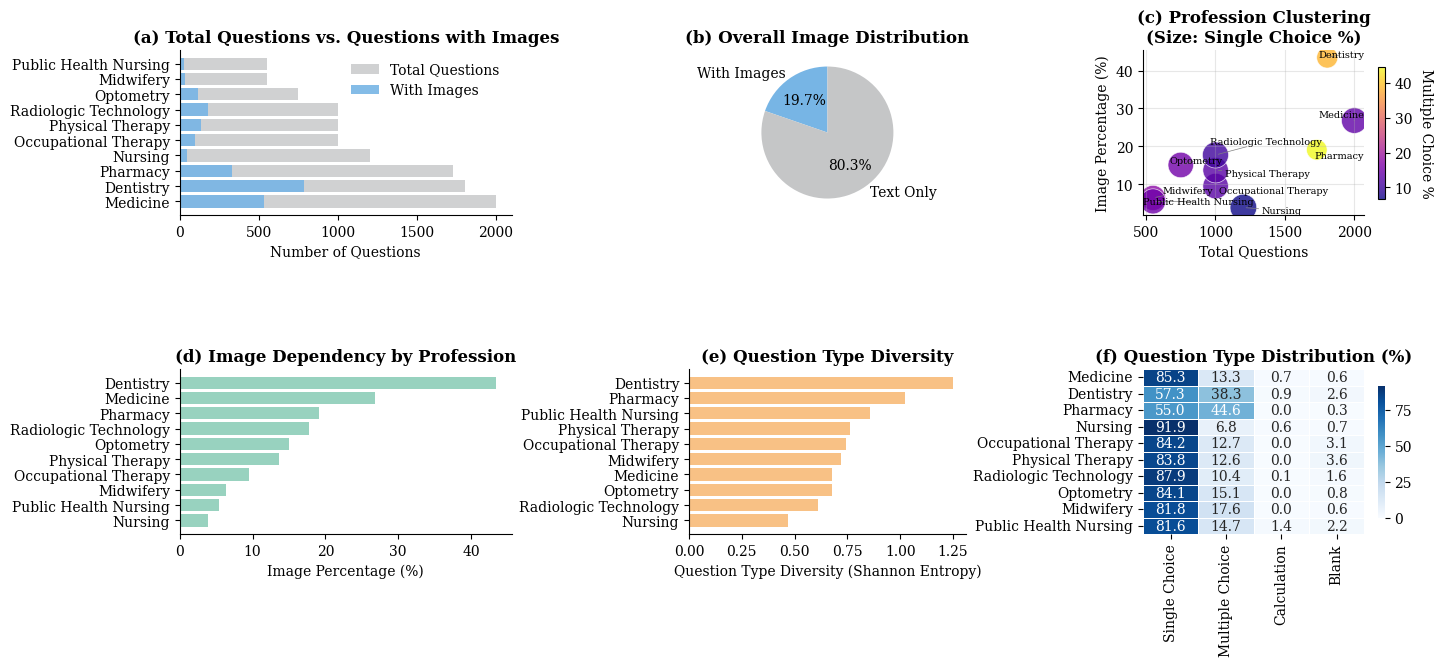

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib
from adjustText import adjust_text

# Set style and colors (academic paper style)
plt.style.use('default')
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.size'] = 10

# Academic color palette (soft, professional colors)
colors_palette = ['#E8F4FD', '#D1E7DD', '#FFF3CD', '#F8D7DA', '#E2E3E5', 
                  '#CCE5FF', '#B3E5B3', '#FFE066', '#FFB3B3', '#D6D6D6']
primary_color = '#4A90C2'
secondary_color = '#7FC7AF'
accent_color = '#F7B267'

# Data
table1 = pd.DataFrame({
    'Profession': ['Medicine', 'Dentistry', 'Pharmacy', 'Nursing', 'Occupational Therapy',
                   'Physical Therapy', 'Radiologic Technology', 'Optometry', 'Midwifery', 'Public Health Nursing'],
    'Total Questions': [2000, 1805, 1730, 1201, 1001, 1001, 1000, 750, 550, 550],
    'With Images': [536, 784, 330, 46, 95, 137, 177, 113, 35, 30]
})

table2 = pd.DataFrame({
    'Profession': ['Medicine', 'Dentistry', 'Pharmacy', 'Nursing', 'Occupational Therapy',
                   'Physical Therapy', 'Radiologic Technology', 'Optometry', 'Midwifery', 'Public Health Nursing'],
    'Single Choice': [85.35, 57.34, 55.03, 91.92, 84.22, 83.82, 87.9, 84.13, 81.82, 81.64],
    'Multiple Choice': [13.35, 38.28, 44.62, 6.83, 12.69, 12.59, 10.4, 15.07, 17.64, 14.73],
    'Calculation': [0.7, 0.94, 0, 0.58, 0, 0, 0.1, 0, 0, 1.45],
    'Blank': [0.6, 2.6, 0.35, 0.67, 3.1, 3.6, 1.6, 0.8, 0.55, 2.18],
    'Sequence': [0, 0.83, 0, 0, 0, 0, 0, 0, 0, 0]
})

# Calculate image percentage
table1['Image Percentage'] = (table1['With Images'] / table1['Total Questions']) * 100

# Create the main figure
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(3, 3, width_ratios=[1.2, 1, 1], height_ratios=[1, 1, 0.8], 
                       hspace=1, wspace=0.6)

# 设置颜色
gray_color = '#c5c6c7'       # Total Questions
blue_color = '#77b5e5'       # With Images

 
ax1 = plt.subplot(gs[0, 0])
table1_sorted = table1.sort_values('Total Questions', ascending=False)
bars1 = ax1.barh(table1_sorted['Profession'], table1_sorted['Total Questions'], 
                 color=gray_color, label='Total Questions', alpha=0.8)
bars2 = ax1.barh(table1_sorted['Profession'], table1_sorted['With Images'], 
                 color=blue_color, label='With Images', alpha=0.9)
ax1.set_xlabel('Number of Questions')
ax1.set_title('(a) Total Questions vs. Questions with Images', fontweight='bold')
ax1.legend(frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

 
ax2 = plt.subplot(gs[0, 1])
 
total_questions = table1['Total Questions'].sum()
total_images = table1['With Images'].sum()
image_ratio = total_images / total_questions
non_image_ratio = 1 - image_ratio

wedges, texts, autotexts = ax2.pie([image_ratio, non_image_ratio], 
                                   labels=['With Images', 'Text Only'],
                                   colors=[blue_color, gray_color],
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   textprops={'fontsize': 10})
ax2.set_title('(b) Overall Image Distribution', fontweight='bold')


 
ax3 = plt.subplot(gs[1, 0])
image_sorted = table1.sort_values('Image Percentage', ascending=True)
bars = ax3.barh(image_sorted['Profession'], image_sorted['Image Percentage'], 
                color=secondary_color, alpha=0.8)
ax3.set_xlabel('Image Percentage (%)')
ax3.set_title('(d) Image Dependency by Profession', fontweight='bold')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

 
def calculate_entropy(row):
    values = [row['Single Choice'], row['Multiple Choice'], row['Calculation'], 
              row['Blank'], row['Sequence']]
    # 转换为概率
    probs = np.array(values) / 100.0
    # 过滤掉0值
    probs = probs[probs > 0]
    # 计算熵
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

table2['Diversity'] = table2.apply(calculate_entropy, axis=1)
diversity_sorted = table2.sort_values('Diversity', ascending=True)

ax4 = plt.subplot(gs[1, 1])
bars = ax4.barh(diversity_sorted['Profession'], diversity_sorted['Diversity'], 
                color=accent_color, alpha=0.8)
ax4.set_xlabel('Question Type Diversity (Shannon Entropy)')
ax4.set_title('(e) Question Type Diversity', fontweight='bold')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

 
ax5 = plt.subplot(gs[0, 2])
merged_data = table1.merge(table2, on='Profession')

scatter = ax5.scatter(
    merged_data['Total Questions'], merged_data['Image Percentage'], 
    s=merged_data['Single Choice'] * 4,
    c=merged_data['Multiple Choice'], 
    cmap='plasma', alpha=0.8,
    edgecolors='white', linewidth=0.5
)

ax5.set_xlabel('Total Questions')
ax5.set_ylabel('Image Percentage (%)')
ax5.set_title('(c) Profession Clustering\n(Size: Single Choice %)', fontweight='bold')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.grid(True, alpha=0.3)

 
cbar = plt.colorbar(scatter, ax=ax5, shrink=0.8)
cbar.set_label('Multiple Choice %', rotation=270, labelpad=15)

 
texts = []
for i, row in merged_data.iterrows():
    texts.append(
        ax5.text(row['Total Questions'], row['Image Percentage'], row['Profession'],
                 fontsize=7, weight='light')
    )

 
adjust_text(texts, ax=ax5, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

 
 
ax6 = plt.subplot(gs[1, 2])
question_types = ['Single Choice', 'Multiple Choice', 'Calculation', 'Blank']
heatmap_data = table2.set_index('Profession')[question_types]
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Blues", 
            cbar_kws={'shrink': 0.8}, ax=ax6, 
            square=False, linewidths=0.5)
ax6.set_title('(f) Question Type Distribution (%)', fontweight='bold')
ax6.set_xlabel('')
ax6.set_ylabel('')

 
# ax7 = plt.subplot(gs[2, :])
# ax7.axis('tight')
# ax7.axis('off')

 
# summary_stats = pd.DataFrame({
#     'Metric': ['Total Questions', 'Questions with Images',
#                'Most Diverse (Entropy)', 'Least Diverse (Entropy)', 'Highest Image %'],
#     'Value': [f"{table1['Total Questions'].sum():,}",
#               f"{table1['With Images'].sum():,}",
              
#               f"{diversity_sorted.iloc[-1]['Profession']} ({diversity_sorted.iloc[-1]['Diversity']:.2f})",
#               f"{diversity_sorted.iloc[0]['Profession']} ({diversity_sorted.iloc[0]['Diversity']:.2f})",
#               f"{image_sorted.iloc[-1]['Profession']} ({image_sorted.iloc[-1]['Image Percentage']:.1f}%)"]
# })

# table = ax7.table(cellText=summary_stats.values, colLabels=summary_stats.columns,
#                   cellLoc='left', loc='center', colWidths=[0.3, 0.7])
# table.auto_set_font_size(False)
# table.set_fontsize(10)
# table.scale(1, 1.5)

 
# for i in range(len(summary_stats.columns)):
#     table[(0, i)].set_facecolor('#4A90C2')
#     table[(0, i)].set_text_props(weight='bold', color='white')

# ax7.set_title('(g) Dataset Summary Statistics', fontweight='bold', pad=20)

 

# 保存为高画质 PDF
plt.savefig("statistics.pdf", format='pdf', dpi=600, bbox_inches='tight')

plt.show()


C:\Users\Tianyang\AppData\Local\Temp\ipykernel_40956\1541923626.py:133: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


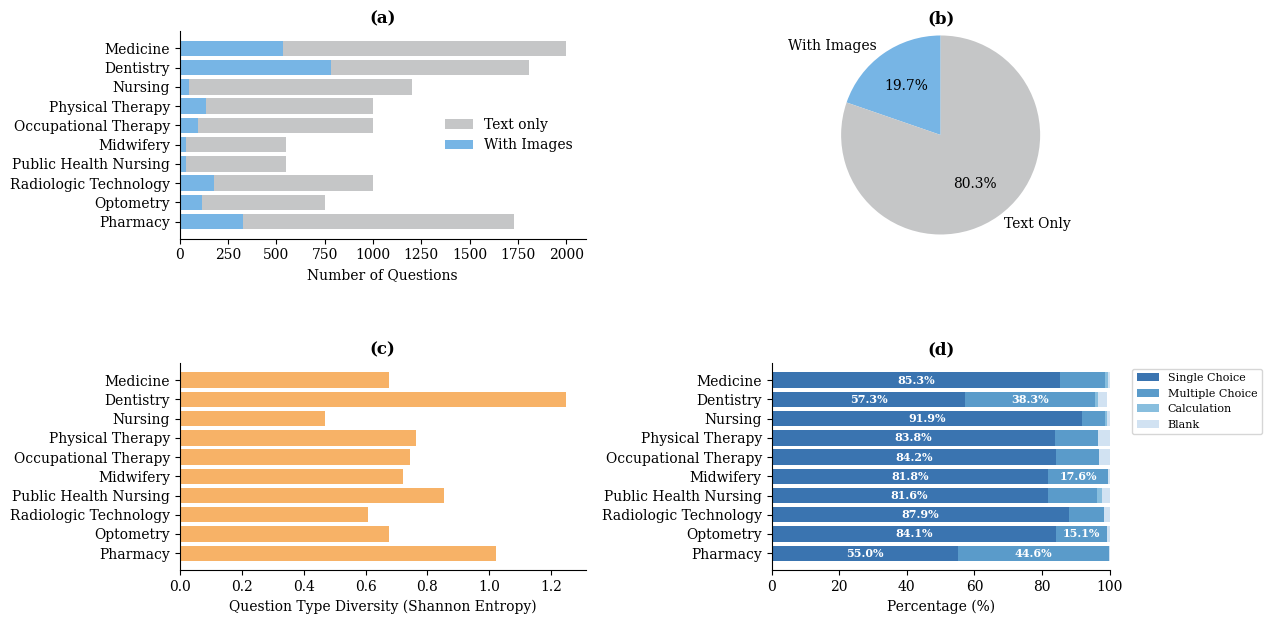

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib

# Set style and font
plt.style.use('default')
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.size'] = 10

# Define fixed profession order
profession_order = [
    'Medicine', 'Dentistry', 'Nursing', 'Physical Therapy', 'Occupational Therapy',
    'Midwifery', 'Public Health Nursing', 'Radiologic Technology', 'Optometry', 'Pharmacy'
]

# Color definitions
gray_color = '#c5c6c7'       # Total Questions
blue_color = '#77b5e5'       # With Images
accent_color = '#F7B267'     # Diversity
heatmap_cmap = "Blues"

# Data
table1 = pd.DataFrame({
    'Profession': ['Medicine', 'Dentistry', 'Pharmacy', 'Nursing', 'Occupational Therapy',
                   'Physical Therapy', 'Radiologic Technology', 'Optometry', 'Midwifery', 'Public Health Nursing'],
    'Total Questions': [2000, 1805, 1730, 1201, 1001, 1001, 1000, 750, 550, 550],
    'With Images': [536, 784, 330, 46, 95, 137, 177, 113, 35, 30]
})

table2 = pd.DataFrame({
    'Profession': ['Medicine', 'Dentistry', 'Pharmacy', 'Nursing', 'Occupational Therapy',
                   'Physical Therapy', 'Radiologic Technology', 'Optometry', 'Midwifery', 'Public Health Nursing'],
    'Single Choice': [85.35, 57.34, 55.03, 91.92, 84.22, 83.82, 87.9, 84.13, 81.82, 81.64],
    'Multiple Choice': [13.35, 38.28, 44.62, 6.83, 12.69, 12.59, 10.4, 15.07, 17.64, 14.73],
    'Calculation': [0.7, 0.94, 0, 0.58, 0, 0, 0.1, 0, 0, 1.45],
    'Blank': [0.6, 2.6, 0.35, 0.67, 3.1, 3.6, 1.6, 0.8, 0.55, 2.18],
    'Sequence': [0, 0.83, 0, 0, 0, 0, 0, 0, 0, 0]
})

# Image percentage
table1['Image Percentage'] = (table1['With Images'] / table1['Total Questions']) * 100

# Merge & reorder
merged_data = table1.merge(table2, on='Profession')
merged_data = merged_data.set_index('Profession').loc[profession_order].reset_index()

# Entropy function
def calculate_entropy(row):
    values = [row['Single Choice'], row['Multiple Choice'], row['Calculation'], row['Blank'], row['Sequence']]
    probs = np.array(values) / 100.0
    probs = probs[probs > 0]
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

merged_data['Diversity'] = merged_data.apply(calculate_entropy, axis=1)

# ==== Setup figure with 2x2 grid ====
fig = plt.figure(figsize=(12, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[1.2, 1], height_ratios=[1, 1], hspace=0.6, wspace=0.5)

# === (a) Total vs. With Images ===
ax1 = plt.subplot(gs[0, 0])
# Reverse order for horizontal bar chart (top to bottom display)
reversed_data = merged_data.iloc[::-1]
ax1.barh(reversed_data['Profession'], reversed_data['Total Questions'], color=gray_color, label='Text only')
ax1.barh(reversed_data['Profession'], reversed_data['With Images'], color=blue_color, label='With Images')
ax1.set_xlabel('Number of Questions')
ax1.set_title('(a)', fontweight='bold')
ax1.legend(frameon=False)
ax1.spines[['top', 'right']].set_visible(False)

# === (b) Pie Chart ===
ax2 = plt.subplot(gs[0, 1])
total_questions = merged_data['Total Questions'].sum()
total_images = merged_data['With Images'].sum()
image_ratio = total_images / total_questions
non_image_ratio = 1 - image_ratio

wedges, texts, autotexts = ax2.pie(
    [image_ratio, non_image_ratio], 
    labels=['With Images', 'Text Only'],
    colors=[blue_color, gray_color],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10},
    radius=1.2  # 默认是1，适当放大
)

ax2.set_title('(b)', fontweight='bold')

# === (c) Entropy Diversity Bar ===
ax3 = plt.subplot(gs[1, 0])
ax3.barh(reversed_data['Profession'], reversed_data['Diversity'], color=accent_color)
ax3.set_xlabel('Question Type Diversity (Shannon Entropy)')
ax3.set_title('(c)', fontweight='bold')
ax3.spines[['top', 'right']].set_visible(False)

# === (d) Stacked Horizontal Bar Chart ===
ax4 = plt.subplot(gs[1, 1])

# Prepare data for stacked bar
categories = ['Single Choice', 'Multiple Choice', 'Calculation', 'Blank']
colors = ['#08519c', '#3182bd', '#6baed6', '#c6dbef']  # Different shades of blue

# Create stacked horizontal bar chart
left = np.zeros(len(reversed_data))
for i, category in enumerate(categories):
    ax4.barh(reversed_data['Profession'], reversed_data[category], 
             left=left, color=colors[i], label=category, alpha=0.8)
    left += reversed_data[category]

# Customize the chart
ax4.set_xlabel('Percentage (%)')
ax4.set_title('(d)', fontweight='bold')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax4.spines[['top', 'right']].set_visible(False)
ax4.set_xlim(0, 100)

# Add percentage labels on bars for major categories
for i, profession in enumerate(reversed_data['Profession']):
    sc = reversed_data.iloc[i]['Single Choice']
    mc = reversed_data.iloc[i]['Multiple Choice']
    # Label Single Choice
    ax4.text(sc / 2, i, f'{sc:.1f}%', ha='center', va='center', fontsize=8, color='white', weight='bold')
    # Label Multiple Choice if > 15%
    if mc > 15:
        ax4.text(sc + mc / 2, i, f'{mc:.1f}%', ha='center', va='center', fontsize=8, color='white', weight='bold')

# Save and display
plt.tight_layout()
plt.savefig("fig2_cleaned_v4.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.show()

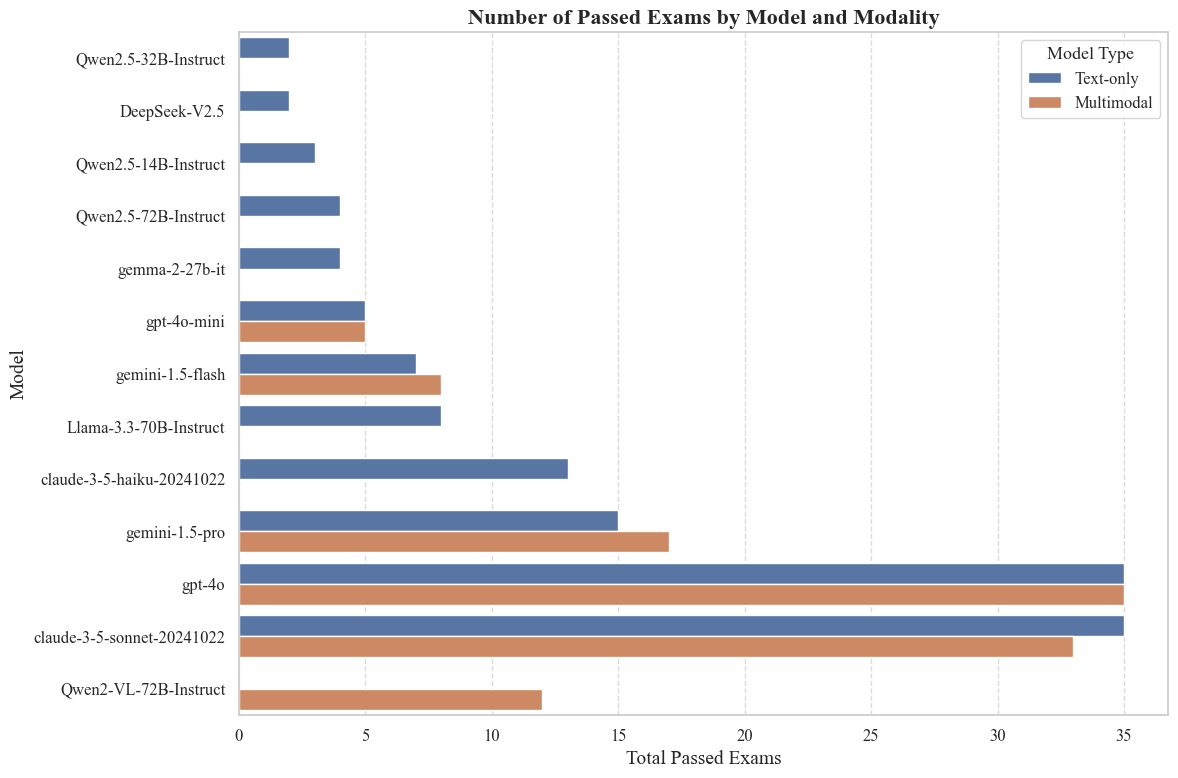

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data from the table: Model name, category, and total passed exams
data = [
    # Text-only models
    ("Qwen2.5-32B-Instruct", "Text-only", 2),
    ("DeepSeek-V2.5", "Text-only", 2),
    ("Qwen2.5-14B-Instruct", "Text-only", 3),
    ("Qwen2.5-72B-Instruct", "Text-only", 4),
    ("gemma-2-27b-it", "Text-only", 4),
    ("gpt-4o-mini", "Text-only", 5),
    ("gemini-1.5-flash", "Text-only", 7),
    ("Llama-3.3-70B-Instruct", "Text-only", 8),
    ("claude-3-5-haiku-20241022", "Text-only", 13),
    ("gemini-1.5-pro", "Text-only", 15),
    ("gpt-4o", "Text-only", 35),
    ("claude-3-5-sonnet-20241022", "Text-only", 35),

    # Multimodal models
    ("gpt-4o-mini", "Multimodal", 5),
    ("gemini-1.5-flash", "Multimodal", 8),
    ("Qwen2-VL-72B-Instruct", "Multimodal", 12),
    ("gemini-1.5-pro", "Multimodal", 17),
    ("claude-3-5-sonnet-20241022", "Multimodal", 33),
    ("gpt-4o", "Multimodal", 35),
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Model", "Category", "Passed"])

plt.rcParams["font.family"] = "Times New Roman"

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x="Passed", y="Model", hue="Category", dodge=True)
plt.title("Number of Passed Exams by Model and Modality", fontsize=16, weight='bold')
plt.xlabel("Total Passed Exams", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=1.5)
plt.legend(title="Model Type", fontsize=12, title_fontsize=13)


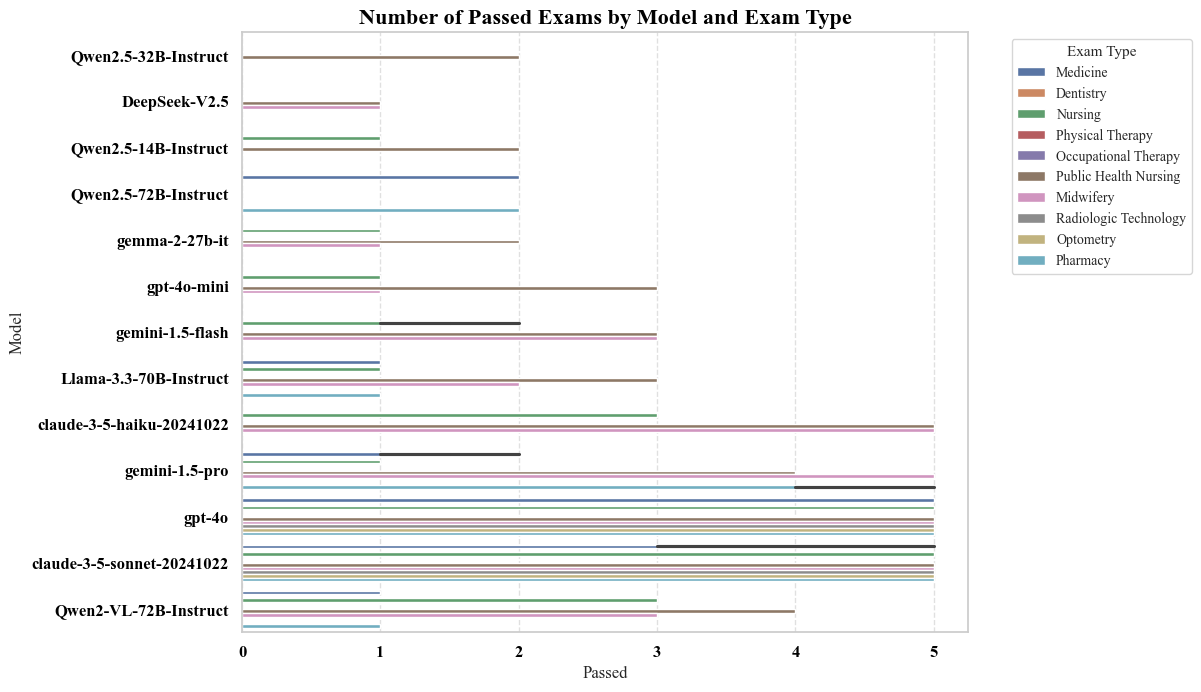

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Expanded data including exam-wise details (10 exams + total)
expanded_data = [
    # Text-only models
    ("Qwen2.5-32B-Instruct", "Text-only", [0, 0, 0, 0, 0, 2, 0, 0, 0, 0]),
    ("DeepSeek-V2.5", "Text-only", [0, 0, 0, 0, 0, 1, 1, 0, 0, 0]),
    ("Qwen2.5-14B-Instruct", "Text-only", [0, 0, 1, 0, 0, 2, 0, 0, 0, 0]),
    ("Qwen2.5-72B-Instruct", "Text-only", [2, 0, 0, 0, 0, 0, 0, 0, 0, 2]),
    ("gemma-2-27b-it", "Text-only", [0, 0, 1, 0, 0, 2, 1, 0, 0, 0]),
    ("gpt-4o-mini", "Text-only", [0, 0, 1, 0, 0, 3, 1, 0, 0, 0]),
    ("gemini-1.5-flash", "Text-only", [0, 0, 1, 0, 0, 3, 3, 0, 0, 0]),
    ("Llama-3.3-70B-Instruct", "Text-only", [1, 0, 1, 0, 0, 3, 2, 0, 0, 1]),
    ("claude-3-5-haiku-20241022", "Text-only", [0, 0, 3, 0, 0, 5, 5, 0, 0, 0]),
    ("gemini-1.5-pro", "Text-only", [1, 0, 1, 0, 0, 4, 5, 0, 0, 4]),
    ("gpt-4o", "Text-only", [5, 0, 5, 0, 0, 5, 5, 5, 5, 5]),
    ("claude-3-5-sonnet-20241022", "Text-only", [5, 0, 5, 0, 0, 5, 5, 5, 5, 5]),

    # Multimodal models
    ("gpt-4o-mini", "Multimodal", [0, 0, 1, 0, 0, 3, 1, 0, 0, 0]),
    ("gemini-1.5-flash", "Multimodal", [0, 0, 2, 0, 0, 3, 3, 0, 0, 0]),
    ("Qwen2-VL-72B-Instruct", "Multimodal", [1, 0, 3, 0, 0, 4, 3, 0, 0, 1]),
    ("gemini-1.5-pro", "Multimodal", [2, 0, 1, 0, 0, 4, 5, 0, 0, 5]),
    ("claude-3-5-sonnet-20241022", "Multimodal", [3, 0, 5, 0, 0, 5, 5, 5, 5, 5]),
    ("gpt-4o", "Multimodal", [5, 0, 5, 0, 0, 5, 5, 5, 5, 5]),
]

# Define exam names
exam_types = [
    "Medicine", "Dentistry", "Nursing", "Physical Therapy", "Occupational Therapy",
    "Public Health Nursing", "Midwifery", "Radiologic Technology", "Optometry", "Pharmacy"
]

# Convert to long-format DataFrame
records = []
for model, category, scores in expanded_data:
    for exam, score in zip(exam_types, scores):
        records.append((model, category, exam, score))

df_expanded = pd.DataFrame(records, columns=["Model", "Category", "Exam", "Passed"])

plt.figure(figsize=(10, 7.14))
sns.barplot(data=df_expanded, x="Passed", y="Model", hue="Exam", dodge=True)

# 设置字体为深黑粗体
plt.title("Number of Passed Exams by Model and Exam Type", fontsize=16, weight='bold', color='black')
 
plt.xticks(fontsize=12, weight='bold', color='black')
plt.yticks(fontsize=12, weight='bold', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout(pad=1.5)
plt.legend(title="Exam Type", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.savefig("Model_Exam_Pass_Statistics.pdf", format='pdf', dpi=600, bbox_inches='tight') 

In [3]:
import pandas as pd
import json

def convert_xlsx_to_json(xlsx_file_path, output_json_file_path, sheet_name=0):
    """
    将XLSX文件的指定工作表转换为JSON文件。
    默认输出为JSON数组，其中每个对象代表一行数据。

    Args:
        xlsx_file_path (str): XLSX文件的完整路径。
        output_json_file_path (str): 输出JSON文件的完整路径。
        sheet_name (str或int): 要转换的工作表名称（字符串）或索引（整数，0代表第一个工作表）。
    """
    try:
        df = pd.read_excel(xlsx_file_path, sheet_name=sheet_name)

        # 将DataFrame转换为JSON格式，orient='records' 表示每行一个JSON对象
        json_data = df.to_json(orient='records', indent=4, force_ascii=False) # indent=4是为了美观的缩进

        with open(output_json_file_path, 'w', encoding='utf-8') as f:
            f.write(json_data)

        print(f"成功将 '{xlsx_file_path}' 的工作表 '{sheet_name}' 转换为 '{output_json_file_path}'")
    except FileNotFoundError:
        print(f"错误：文件 '{xlsx_file_path}' 未找到。请检查路径。")
    except ValueError:
        print(f"错误：工作表 '{sheet_name}' 未在 '{xlsx_file_path}' 中找到。请检查工作表名称或索引。")
    except Exception as e:
        print(f"转换过程中发生错误：{e}")

# 示例用法：
# 假设您的原始XLSX文件名为 'your_data.xlsx'
# 并且您想将第一个工作表（索引为0）转换为 'output_data.json'
# convert_xlsx_to_json('your_data.xlsx', 'output_data.json', sheet_name=0)

# 如果您的XLSX文件名为 "ablation(2).xlsx" 且您希望转换为JSON
# 请确保将 'ablation(2).xlsx' 放在与Python脚本相同的目录，或提供完整路径。
# convert_xlsx_to_json('ablation(2).xlsx', 'ablation_table1.json', sheet_name='table1') # 如果sheet名称是'table1'
# 或者
# convert_xlsx_to_json('ablation(2).xlsx', 'ablation_sheet1.json', sheet_name=0) # 如果是第一个sheet

An error occurred: Error tokenizing data. C error: Expected 1 fields in line 4, saw 3

